# Drivers of Churn

# Planning

___

## Primary Goals: 
- Determine drivers of churn from Telco Dataset. 
- Determine and create a ML Classification Model to accurately predict churn.

## Imports

In [1]:
import pandas as pd, numpy as np
import acquire as acq, prepare as prep
import seaborn as sns, matplotlib.pyplot as plt
import os
from acquire import get_connection, get_telco_data
from prepare import prep_telco, dropped
from sklearn.model_selection import train_test_split
from modeling import dt_comp, rf_comp, knn_comp, lr_comp, model_comp

import warnings
warnings.filterwarnings("ignore")

## Steps:
- We need to gather the info from the Telco Dataset first. 
- The initial intent is to grab everything through functions we have created previously and store the dataset here to be processed further.
- After gathering the data it needs to be cleaned and prepped. Initially that means determining what to do with possible null values.
- We'll need different types of information for different stages of the pipeline, so we'll likely change the data a few different times at different stages.

___

# Acquisition

In [2]:
telco = get_telco_data()

- Gathered Telco Dataset from SQL
- Before cleaning, the dataset had a size of 7043 rows by 24 columns
- Every row present is indicative of all our customers, churned or not
- The columns are features for each of those customers

___

# Preparation

In [3]:
telco = prep_telco(telco)
telco['target'] = (telco['churn'] == 'Yes')
telco = telco.drop(columns='churn')
train_validate, test = train_test_split(telco, test_size=0.2, random_state=117, stratify=telco['target'])
train, validate = train_test_split(train_validate, test_size=0.3, random_state=117, stratify=train_validate['target'])

## Steps Taken to Clean Dataset:
- Dropped unnecessary columns
- Filled in null values
- Determined if columns were appropriate data types 
- Encoded and/or created dummy variables where needed
- Renamed columns for visual clarity
- Split cleaned data into train, validate, test (~55/25/20), stratifying on 'target' ('churn')

## Data Dictionary

In [ ]:
#

## Let's look at a small view of the training data so far

In [4]:
train.head(5)

,senior_citizen,tenure,monthly_charges,total_charges,gender_,has_partner,has_dependents,has_phone_service,has_multiple_lines,contract,internet_service,has_automatic_payment,has_amenities,has_internet_service,target
4993,0,56,59.80,3457.45,1,1,1,1,1,2,1,1,0,1,False
190,0,5,96.10,453.40,1,0,0,1,1,0,2,0,0,1,True
5071,1,16,54.55,825.10,1,1,0,1,1,0,1,1,0,1,False
461,0,63,71.90,4479.20,1,0,0,1,2,2,1,1,1,1,False
2383,1,3,74.60,239.05,0,1,0,1,1,0,2,1,0,1,False


## What are we seeing?
- We have a lot of categorical features, even after combining several but it's much more palatable now

___

# Exploration

## Initial Hypothesis/Predictions:
- Churn rate is affected by how much a customer pays for their plan.
- Amenities or additional benefits a customer will affect churn rate.

## Initial Stats Testing

## Because we have so many categorical features, we did a $χ^2$ test on a few to determine dependency:
### The following features all showed statistical dependence:
- monthly charges
- if a customer has amenities
- if a customer has internet service
- if a customer has dependents
- contract type

## After further review of churn rate comparison, we found the top 4 drivers for churn rate:
- The greatest difference in churn rate is <font color='yellow'>contract type</font>
  - Churn rate drops about <font color='yellow'>40%</font> from a monthly contract to a 2 year contract
  - Churn rate drops about <font color='yellow'>30%</font> from a monthly contract to a 1 year contract
- Having internet service reduced churn rate by about <font color='yellow'>23%</font>
- Having a lower than average monthly charge reduces churn rate by about <font color='yellow'>19%</font>
- Senior citizens tend to have a higher churn rate than non-seniors by about <font color='yellow'>19%</font>

___

# Modeling

## The percentage of '0' (or 'Active Customers' in our data) made up <font color='yellow'>73%</font> of all our customers, so our baseline accuracy for our target is <font color='yellow'>73%</font>.

### Four different models were created to determine our best accuracy of our split data:
- Decision Tree
- Random Forest
- KNN
- Logistic Regression

### We can visualize the first three

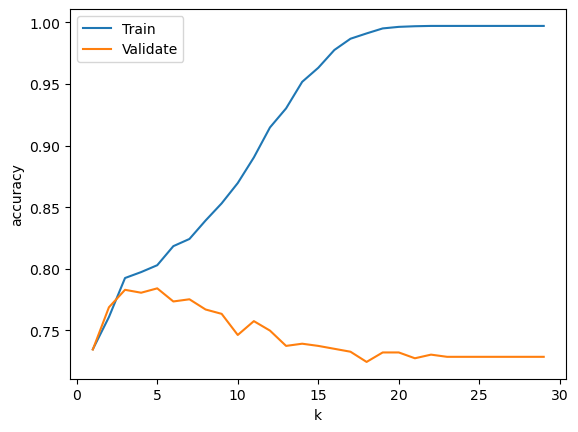

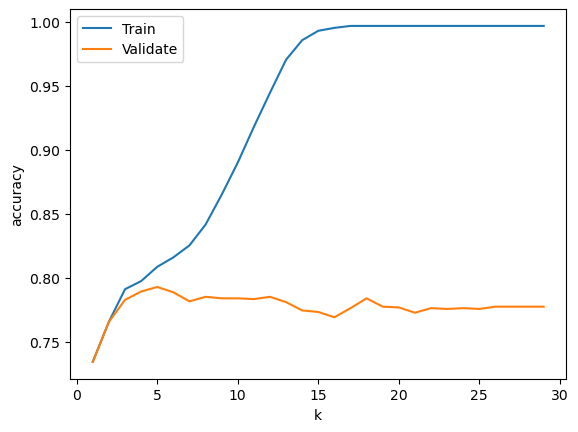

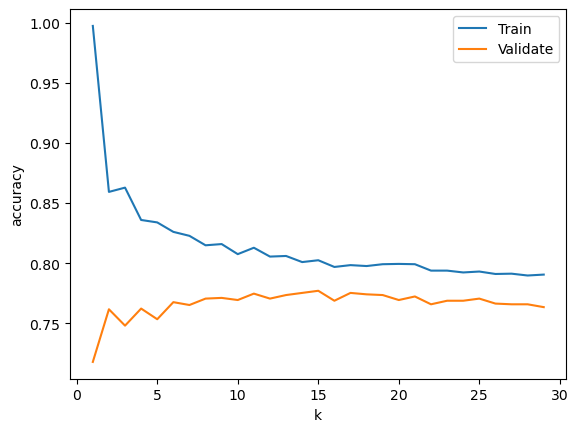

In [17]:
dt_comp()
rf_comp()
knn_comp()

#### For Logistic Regression, we created five models with varying feature sizes to cast a wide net and determined the first Model we created had the best accuracy score

In [18]:
lr_comp()

Logistic Regression Model Accuracy Scores:

Baseline Accuracy Score:
73.463013%

Model 1 Train Accuracy Score:
80.167385%
Model 1 Validate Accuracy Score:
79.302188%

Model 2 Train Accuracy Score:
79.939133%
Model 2 Validate Accuracy Score:
78.888232%

Model 3 Train Accuracy Score:
79.431905%
Model 3 Validate Accuracy Score:
78.356002%

Model 4 Train Accuracy Score:
78.899315%
Model 4 Validate Accuracy Score:
78.415139%

Model 5 Train Accuracy Score:
78.721785%
Model 5 Validate Accuracy Score:
76.700177%    


___

#### Best Decision Tree Model Resulted in:
#### Training Accuracy of: 
- <font color='yellow'>80.294192%</font>
#### Validate Accuracy of:
- <font color='yellow'>80.898876%</font>

___

#### Best Random Forest Model Resulted in:
#### Training Accuracy of: 
- <font color='yellow'>80.243469%</font>
#### A Validate Accuracy of:
- <font color='yellow'>81.431106%</font>

___

#### Best KNN Model Resulted in:
#### Training Accuracy of: 
- <font color='yellow'>80.243469%</font>
#### A Validate Accuracy of:
- <font color='yellow'>77.942046%</font>

___

#### Best Logistic Regression Model Resulted in:
#### Training Accuracy of: 
- <font color='yellow'>80.167385%</font>
#### A Validate Accuracy of:
- <font color='yellow'>79.302188%</font>

___

### Both our Decision Tree and Random Forest models performed in the 80% range for the training and validation set so we'll run the test set to see which comes out best.

#### Decision Tree:
Training Accuracy:
- <font color='yellow'>80.294192%</font>

Validation Accuracy:
- <font color='yellow'>80.898876%</font>

Test Accuracy:
- <font color='yellow'>81.689141%</font>
---
#### Random Forest:
Training Accuracy:
- <font color='yellow'>80.420999%</font>

Validation Accuracy:
- <font color='yellow'>80.721467%</font>

Test Accuracy:
- <font color='yellow'>81.618169%</font>

#### So our Decision Tree Model performed the best at almost 82% to our Baseline of about 74%

___

# Conclusion